To predict the Air Quality Index of different cities.

Dataset source: Kaggle

Dataset taken from: 1st Jan, 2015 to 1st July, 2020

In [201]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [202]:
# reading dataset
data = pd.read_csv("AQI_City-Wise.csv",parse_dates = ['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [203]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [204]:
# getting dimensions of the data
data.shape

(29531, 16)

In [205]:
# getting additional information
data.info

<bound method DataFrame.info of                 City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Tolue

In [206]:
# to check for missing values
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [207]:
# dropping missing values
data = data.dropna()
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [208]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [209]:
# getting new dimensions of data
data.shape

(6236, 16)

In [210]:
# setting "Date" column as index
df = data.set_index("Date")
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2017-11-25,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2017-11-26,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2017-11-27,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2017-11-28,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2017-11-29,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [211]:
# count unique values of "city" column
df['City'].value_counts()

Hyderabad        1618
Delhi            1224
Visakhapatnam    1131
Amaravati         646
Amritsar          636
Kolkata           394
Chandigarh        277
Patna             191
Gurugram          119
Name: City, dtype: int64

In [212]:
# to get the statistical information about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,6236.0,61.327365,53.709682,2.00,27.9275,47.490,73.4425,639.19
PM10,6236.0,123.418321,85.791491,7.80,66.9700,103.010,150.7700,796.88
NO,6236.0,17.015191,20.037836,0.25,5.0800,10.060,19.3925,159.22
NO2,6236.0,31.708190,18.784041,0.17,15.9775,28.900,43.6325,140.17
NOx,6236.0,32.448956,27.388129,0.17,14.5475,24.285,39.6225,224.09
NH3,6236.0,20.737070,16.088215,0.12,10.3900,14.690,28.5450,166.70
CO,6236.0,0.984344,1.356161,0.00,0.4900,0.730,1.0600,16.23
SO2,6236.0,11.514426,7.166113,0.71,6.5575,9.875,14.4300,70.39
O3,6236.0,36.127691,19.553695,1.55,22.3575,32.540,45.5125,162.33
Benzene,6236.0,3.700361,5.062159,0.00,0.9100,2.435,4.6200,64.44


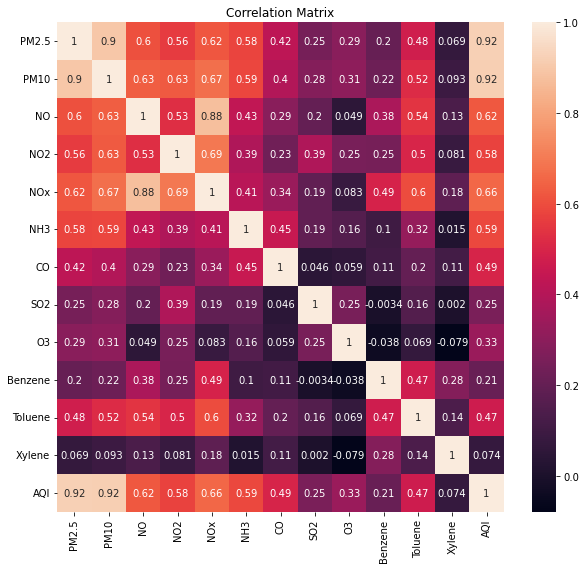

In [213]:
# getting correlation matrix
df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

# Data Visualization

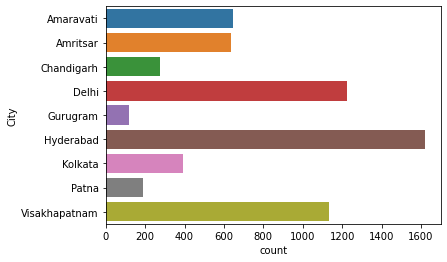

In [214]:
# Univariate Analysis
sns.countplot(y=df.City)
plt.show()

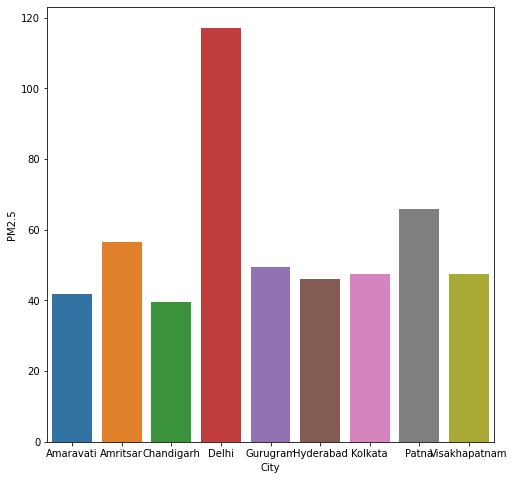

In [215]:
plt.figure(figsize = (8,8))
sns.barplot(y='PM2.5',x='City',data=df,ci= 0)
plt.show()

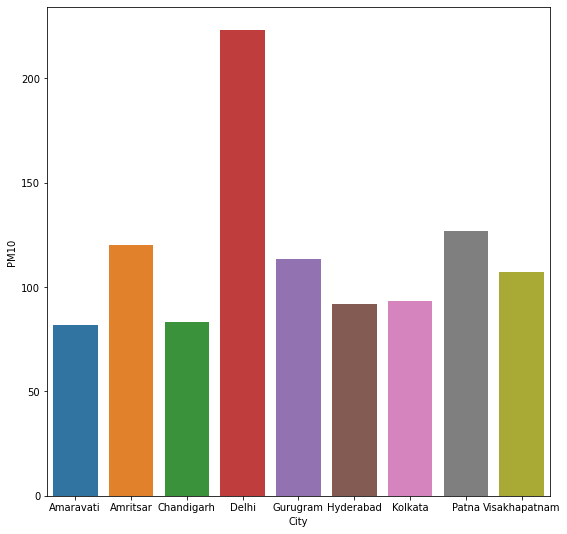

In [216]:
plt.figure(figsize = (9,9))
sns.barplot(y='PM10',x='City',data=df,ci= 0)
plt.show()

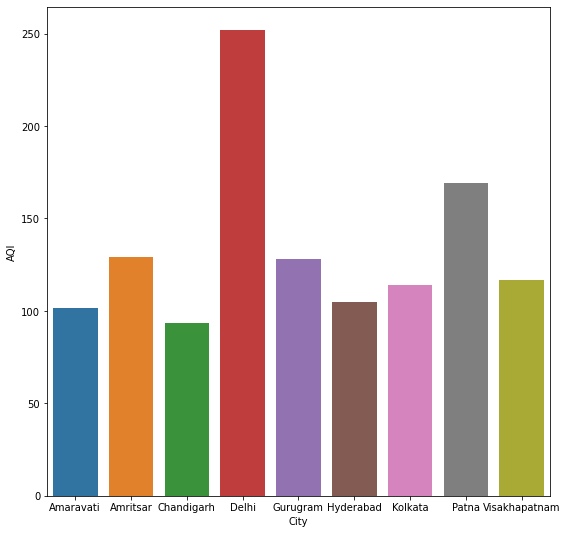

In [217]:
plt.figure(figsize = (9,9))
sns.barplot(y='AQI',x='City',data=df,ci= 0)
plt.show()

count    6236.000000
mean       61.327365
std        53.709682
min         2.000000
25%        27.927500
50%        47.490000
75%        73.442500
max       639.190000
Name: PM2.5, dtype: float64


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

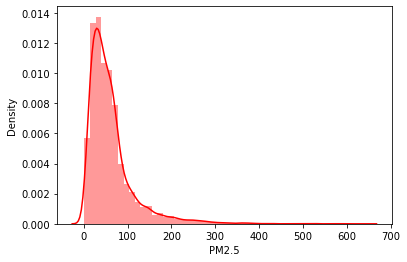

In [218]:
# getting statistical analysis of PM2.5
print(df['PM2.5'].describe())
sns.distplot(df['PM2.5'], color='r')

count    6236.000000
mean      123.418321
std        85.791491
min         7.800000
25%        66.970000
50%       103.010000
75%       150.770000
max       796.880000
Name: PM10, dtype: float64


<AxesSubplot:xlabel='PM10', ylabel='Density'>

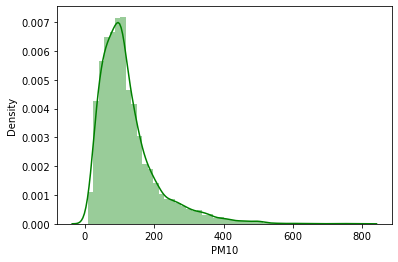

In [219]:
# getting statistical analysis of PM10
print(df['PM10'].describe())
sns.distplot(df['PM10'], color='g')

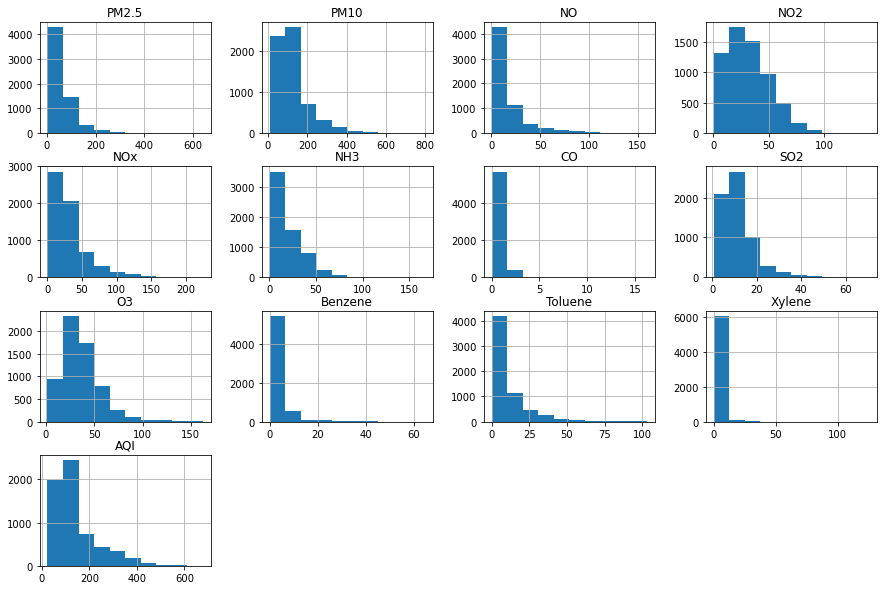

In [220]:
df.hist(figsize=(15,10),bins=10)
plt.show()

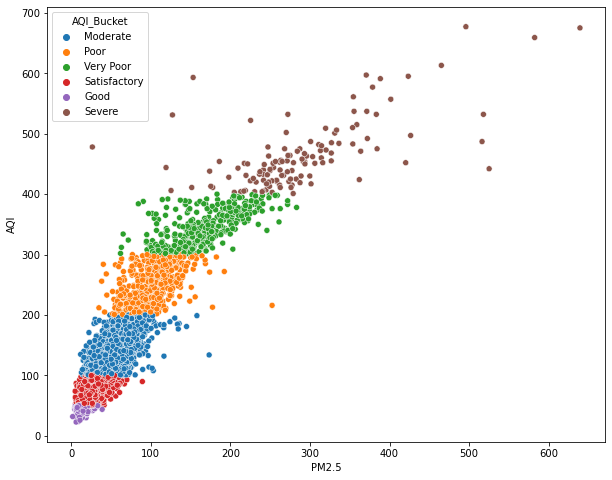

In [221]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PM2.5',y='AQI',data=df, hue="AQI_Bucket")
plt.show()

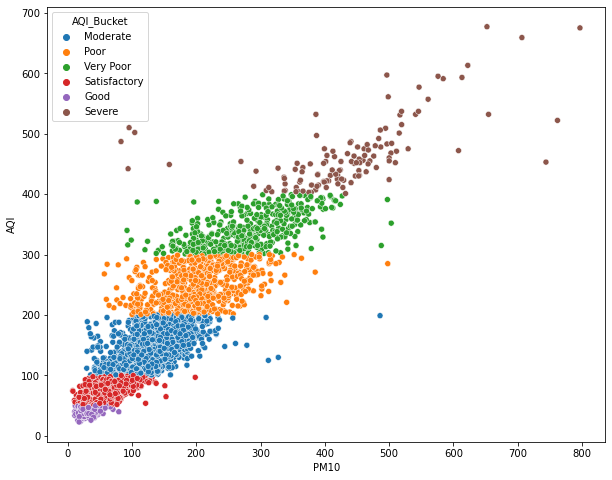

In [222]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PM10',y='AQI',data=df, hue="AQI_Bucket")
plt.show()

In [223]:
# dropping unnecessary column
df = df.drop(['AQI_Bucket'], axis = 1)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2017-11-25,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2017-11-26,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2017-11-27,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2017-11-28,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2017-11-29,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0


In [224]:
# getting columns of the dataset
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [225]:
# Applying one-hot encoding
ct = pd.get_dummies(df.City,prefix="City_") 
ct

,City__Amaravati,City__Amritsar,City__Chandigarh,City__Delhi,City__Gurugram,City__Hyderabad,City__Kolkata,City__Patna,City__Visakhapatnam
Date,,,,,,,,,
2017-11-25,1,0,0,0,0,0,0,0,0
2017-11-26,1,0,0,0,0,0,0,0,0
2017-11-27,1,0,0,0,0,0,0,0,0
2017-11-28,1,0,0,0,0,0,0,0,0
2017-11-29,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-06-26,0,0,0,0,0,0,0,0,1
2020-06-27,0,0,0,0,0,0,0,0,1
2020-06-28,0,0,0,0,0,0,0,0,1


In [226]:
# adding original dataframe to encoded dataframe
df = pd.concat([df, ct], axis = 1)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,AQI,City__Amaravati,City__Amritsar,City__Chandigarh,City__Delhi,City__Gurugram,City__Hyderabad,City__Kolkata,City__Patna,City__Visakhapatnam
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-25,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,...,184.0,1,0,0,0,0,0,0,0,0
2017-11-26,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,...,197.0,1,0,0,0,0,0,0,0,0
2017-11-27,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,...,198.0,1,0,0,0,0,0,0,0,0
2017-11-28,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,...,188.0,1,0,0,0,0,0,0,0,0
2017-11-29,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,...,173.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,...,47.0,0,0,0,0,0,0,0,0,1
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,...,41.0,0,0,0,0,0,0,0,0,1
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,...,70.0,0,0,0,0,0,0,0,0,1


In [227]:
df = df.drop(['City'],axis = 1)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,AQI,City__Amaravati,City__Amritsar,City__Chandigarh,City__Delhi,City__Gurugram,City__Hyderabad,City__Kolkata,City__Patna,City__Visakhapatnam
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,...,184.0,1,0,0,0,0,0,0,0,0
2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,...,197.0,1,0,0,0,0,0,0,0,0
2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,...,198.0,1,0,0,0,0,0,0,0,0
2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,...,188.0,1,0,0,0,0,0,0,0,0
2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,...,173.0,1,0,0,0,0,0,0,0,0


In [228]:
df.shape

(6236, 22)

In [229]:
# splitting independent and target variables
x = df.drop(['AQI'], axis=1)
y = df['AQI']
print(x)

            PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  \
Date                                                                        
2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09   
2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44   
2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81   
2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18   
2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74   
...           ...     ...   ...    ...    ...    ...   ...    ...     ...   
2020-06-26   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87   19.90   
2020-06-27  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55   23.30   
2020-06-28  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72   30.14   
2020-06-29  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42   30.96   
2020-06-30  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84   28.30   

In [230]:
# splitting dataset into training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [231]:
# Applying linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([175.16235956, 141.81027251, 150.40276763, ..., 151.12219342,
        51.18284167, 144.89045481])

In [232]:
# accuracy score on testing data
score = lr.score(x_test,y_test)
print(score*100)

scr = r2_score(y_test, y_pred) # coefficient of determination: 1 is perfect prediction
print(scr)

91.75033896035075
0.9175033896035075


In [233]:
# Evaluation of performance of linear regression model
err = mean_squared_error(y_test, y_pred) # calculate mean square error
print(err)

err_1 = mean_squared_error(y_test, y_pred, squared = False) # calculate root mean square error
print(err_1)

err_2 = mean_absolute_error(y_test, y_pred) # calculate mean absolute error
print(err_2)

687.0072285048009
26.210822736129458
17.71071338590022


In [234]:
ab = {'Real Values':y_test, 'Predicted Values':y_pred}
d = pd.DataFrame(ab)
d

,Real Values,Predicted Values
Date,,
2020-05-26,153.0,175.162360
2018-01-15,143.0,141.810273
2018-10-07,153.0,150.402768
2020-06-12,87.0,97.325683
2018-05-11,95.0,96.560349
...,...,...
2018-03-28,62.0,79.203528
2019-09-09,49.0,60.411761
2020-02-29,144.0,151.122193


On the basis of MAE, the linear model is considered for AQI prediction.